In [1]:
from torch.nn import BCEWithLogitsLoss
import torch
import numpy as np
from func.network import VoxResNet, CellSegNet_basic_lite, CellSegNet_basic_edge_gated_X
import matplotlib.pyplot as plt
import torch.nn as nn

from func.ultis import load_obj

In [2]:
load_path = 'output/model_HMS_edge_gated_12.pkl'
#load_path = 'output/model_HMS_delete_fake_cells.pkl'

# init model
model=CellSegNet_basic_edge_gated_X(input_channel=1, n_classes=3, output_func = "softmax")

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

checkpoint = torch.load(load_path)
model.load_state_dict(checkpoint['model_state_dict'], strict=False)


<All keys matched successfully>

In [3]:
test_img = np.load("data/CellSeg_dataset/HMS_processed/raw/135.npy")

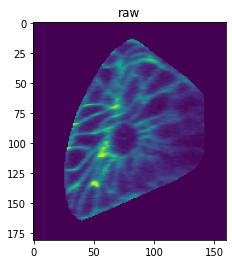

In [4]:
plt.figure()
plt.title("raw")
plt.imshow(test_img[:,150,:])

In [5]:
test_img_cropped = test_img[60:124, 100:164, 40:104]


In [6]:
raw_img_crop=torch.from_numpy(test_img_cropped).float().to(device)
raw_img_crop = torch.unsqueeze(raw_img_crop, 0)
raw_img_crop = torch.unsqueeze(raw_img_crop, 0)
print(raw_img_crop.shape)
output_model, edge_output = model(raw_img_crop)

torch.Size([1, 1, 64, 64, 64])


/opt/anaconda3/envs/CellSeg3D_torch/lib/python3.8/site-packages/torch/nn/functional.py:1944: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


In [7]:
output_model = output_model.detach().numpy()
edge_output = edge_output.detach().numpy()

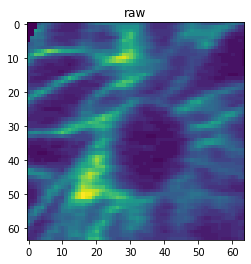

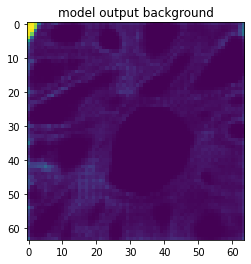

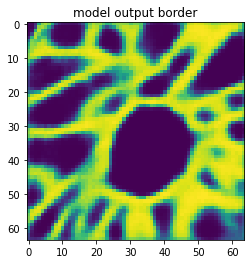

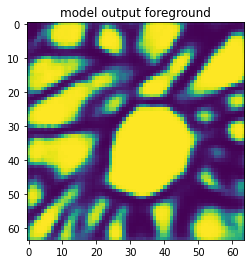

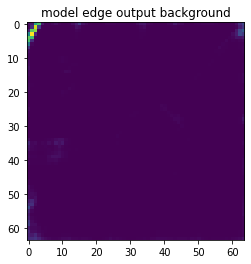

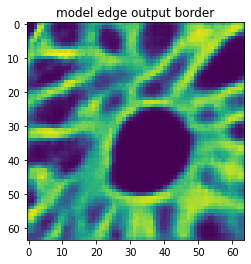

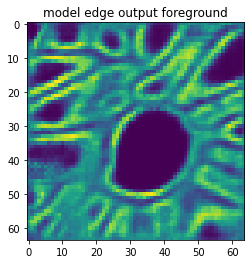

In [8]:
plt.figure()
plt.title("raw")
plt.imshow(test_img_cropped[:,50,:])

plt.figure()
plt.title("model output background")
plt.imshow(output_model[0,0,:,50,:])

plt.figure()
plt.title("model output border")
plt.imshow(output_model[0,1,:,50,:])

plt.figure()
plt.title("model output foreground")
plt.imshow(output_model[0,2,:,50,:])


plt.figure()
plt.title("model edge output background")
plt.imshow(edge_output[0,0,:,50,:])

plt.figure()
plt.title("model edge output border")
plt.imshow(edge_output[0,1,:,50,:])

plt.figure()
plt.title("model edge output foreground")
plt.imshow(edge_output[0,2,:,50,:])

In [9]:
from func.dataset_preprocess import process_one_cuboid_with_all_edges


background_mask = np.load('data/CellSeg_dataset/HMS_processed/segmentation/135/135_background_3d_mask.npy')
foreground_mask = np.load('data/CellSeg_dataset/HMS_processed/segmentation/135/135_foreground_3d_mask.npy')
boundary_mask = np.load('data/CellSeg_dataset/HMS_processed/segmentation/135/135_boundary_3d_mask.npy')

background_mask_cropped = background_mask[60:124, 100:164, 40:104]
foreground_mask_cropped = foreground_mask[60:124, 100:164, 40:104]
boundary_mask_cropped = boundary_mask[60:124, 100:164, 40:104]

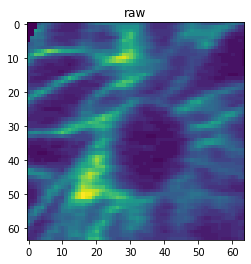

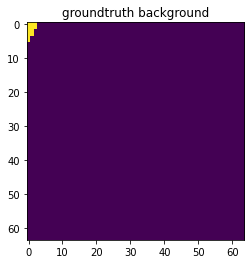

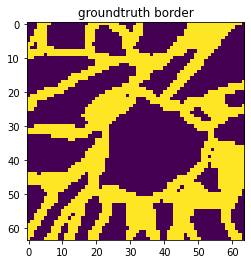

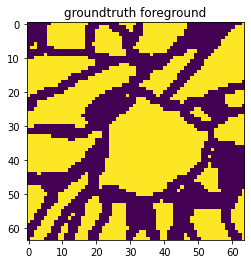

In [10]:
plt.figure()
plt.title("raw")
plt.imshow(test_img_cropped[:,50,:])

plt.figure()
plt.title("groundtruth background")
plt.imshow(background_mask_cropped[:,50,:])

plt.figure()
plt.title("groundtruth border")
plt.imshow(boundary_mask_cropped[:,50,:])

plt.figure()
plt.title("groundtruth foreground")
plt.imshow(foreground_mask_cropped[:,50,:])


In [11]:
background_mask.shape

(181, 331, 160)

In [12]:
np.unique(foreground_mask_cropped[:,50,:])

array([0., 1.], dtype=float32)

In [13]:
test_img = np.load("data/CellSeg_dataset/HMS_processed/raw/65.npy")

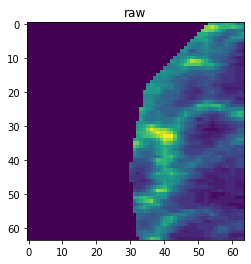

In [14]:
test_img_cropped = test_img[64:128, 64:128, 0:64]

plt.figure()
plt.title("raw")
plt.imshow(test_img_cropped[:,20,:])

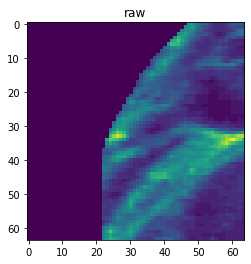

In [15]:
test_img_cropped = test_img[64:128, 128:192, 0:64]

plt.figure()
plt.title("raw")
plt.imshow(test_img_cropped[:,20,:])

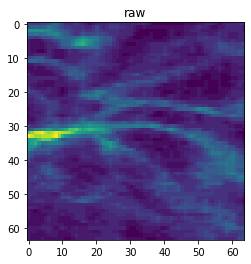

In [16]:
test_img_cropped = test_img[64:128, 128:192, 64:128]

plt.figure()
plt.title("raw")
plt.imshow(test_img_cropped[:,20,:])

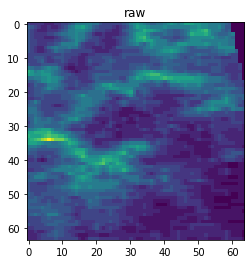

In [17]:
test_img_cropped = test_img[64:128, 192:256, 64:128]

plt.figure()
plt.title("raw")
plt.imshow(test_img_cropped[:,20,:])


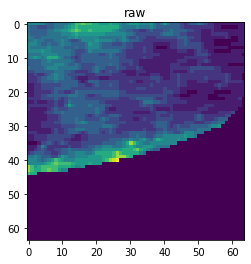

In [18]:
test_img_cropped = test_img[110:174, 192:256, 64:128]

plt.figure()
plt.title("raw")
plt.imshow(test_img_cropped[:,20,:])


In [19]:
HMS_data_dict = load_obj("dataset_info/HMS_dataset_info")
HMS_data_dict_test = HMS_data_dict["test"]

for i in HMS_data_dict_test.keys():
    print(i)

65
135
120
90


In [20]:
# load val data
HMS_data_dict = load_obj("dataset_info/HMS_dataset_info")
HMS_data_dict_val = HMS_data_dict["test"]["65"]

In [21]:
HMS_data_dict_val

raw_val = np.load(HMS_data_dict_val['raw'])
background_val = np.load(HMS_data_dict_val['background'])
boundary_val = np.load(HMS_data_dict_val['boundary'])
foreground_val = np.load(HMS_data_dict_val['foreground'])

raw_val_0 = raw_val[64:128, 64:128, 0:64]
background_val_0 = background_val[64:128, 64:128, 0:64] > 0
boundary_val_0 = boundary_val[64:128, 64:128, 0:64] > 0
foreground_val_0 = foreground_val[64:128, 64:128, 0:64] > 0

stack_gt_0 = np.stack((background_val_0, boundary_val_0, foreground_val_0), axis=0)

raw_val_1 = raw_val[64:128, 128:192, 0:64]
background_val_1 = background_val[64:128, 128:192, 0:64] > 0
boundary_val_1 = boundary_val[64:128, 128:192, 0:64] > 0
foreground_val_1 = foreground_val[64:128, 128:192, 0:64] > 0

stack_gt_1 = np.stack((background_val_1, boundary_val_1, foreground_val_1), axis=0)

raw_val_2 = raw_val[64:128, 128:192, 64:128]
background_val_2 = background_val[64:128, 128:192, 64:128] > 0
boundary_val_2 = boundary_val[64:128, 128:192, 64:128] > 0
foreground_val_2 = foreground_val[64:128, 128:192, 64:128] > 0

stack_gt_2 = np.stack((background_val_2, boundary_val_2, foreground_val_2), axis=0)

raw_val_3 = raw_val[64:128, 192:256, 64:128]
background_val_3 = background_val[64:128, 192:256, 64:128] > 0
boundary_val_3 = boundary_val[64:128, 192:256, 64:128] > 0
foreground_val_3 = foreground_val[64:128, 192:256, 64:128] > 0

stack_gt_3 = np.stack((background_val_3, boundary_val_3, foreground_val_3), axis=0)

raw_val_4 = raw_val[110:174, 192:256, 64:128]
background_val_4 = background_val[110:174, 192:256, 64:128] > 0
boundary_val_4 = boundary_val[110:174, 192:256, 64:128] > 0
foreground_val_4 = foreground_val[110:174, 192:256, 64:128] > 0

stack_gt_4 = np.stack((background_val_4, boundary_val_4, foreground_val_4), axis=0)

final_gt_stack = np.stack((stack_gt_0,
                           stack_gt_1,
                           stack_gt_2,
                           stack_gt_3,
                           stack_gt_4), axis=0)

val_input = np.stack((raw_val_0,
                      raw_val_1,
                      raw_val_2,
                      raw_val_3,
                      raw_val_4), axis=0)

val_input = np.expand_dims(val_input, axis=1)

FileNotFoundError: [Errno 2] No such file or directory: '../../../mnt/HMS_processed/raw/65.npy'

In [ ]:
print(val_input.shape)